In [12]:
using Convex, SCS
using Plots
pyplot()
default(size=(500,300))

In [21]:
n = 2
X = randn(n, n)
# eigs = randn(n)
eigs = linspace(-2, -0.5, 100)
# A = diagm([-4, -1, 3, 6])
A = diagm([-4, 6])
#A = diagm(eigs)
# b = randn(n);
# b = 1e-2*[1, 0, 1, 1]
b = 1e-2*[1, 1]
x = Variable(n)
X = Semidefinite(n)
constraints = [ trace(X) <= 1, ([X x; x' 1] ⪰ 0)]
problem = minimize(trace(A*X) + 2*b'*x, constraints)
solve!(problem, SCSSolver(eps=1e-7));
f_star = problem.optval/2 # your value from CVX goes here
s_cvx = x.value

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 19
eps = 1.00e-07, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 7, constraints m = 15
Cones:	primal zero / dual free vars: 5
	linear vars: 1
	sd vars: 9, sd blks: 2
Setup time: 4.99e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       nan       inf  1.24e-04 
   100| 1.06e-04  1.02e-02  4.00e-04 -4.00e+00 -4.00e+00  5.47e-16  5.67e-04 
   200| 9.82e-05  1.00e-02  6.45e-05 -4.00e+00 -4.00e+00  2.74e-16  9.28e-04 
   300| 9.86e-05  1.00e-02  9.63e-05

2×1 Array{Float64,2}:
 -0.999999   
 -0.000999001

In [22]:
b'*A*b

0.00019999999999999993

In [23]:
# x = zeros(n)
x = -b/norm(b)
f(x) = 0.5 * dot(x, A*x) + dot(b, x)
grad(x) = A*x + b
fs = [f(x)]
norms = [norm(x)]
iterates = [x]
grads = [grad(x)]
for k in 1:3000
	x -= 1/(2*norm(A)) * grad(x)
	if norm(x) > 1
		x /= norm(x)
	end
	push!(fs, f(x) - f_star)
    push!(norms, norm(x))
    push!(iterates, x)
    push!(grads, grad(x))
end
s = iterates[end]

2-element Array{Float64,1}:
 -1.0        
 -0.000999001

In [24]:
norm(s - s_cvx)

1.928505314178743e-9

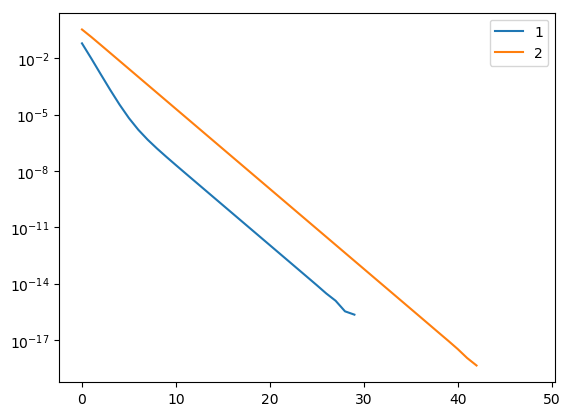

PyObject <matplotlib.legend.Legend object at 0x12f920a90>

In [26]:
v = hcat(([abs.(x - s) for x in iterates[2:50]])...)
for i in 1:2
    semilogy(v[i,:], label="$i")
end
legend()

In [55]:
x1 = ([x[1] for x in iterates])
x2 = ([x[2] for x in iterates])
print(typeof(A*vcat(x1[1], x2[1]) + b))
Plots.plot(x1, x2, (x1, y1) -> (0.5*vcat(x1, y1)'*A*vcat(x1, y1) + b'*vcat(x1, y1)), nlevels=10, w=4)

Array{Float64,1}

MethodError: [91mMethodError: no method matching start(::Plots.Surface{Array{Float64,2}})[0m
Closest candidates are:
  start([91m::SimpleVector[39m) at essentials.jl:258
  start([91m::Base.MethodList[39m) at reflection.jl:560
  start([91m::ExponentialBackOff[39m) at error.jl:107
  ...[39m

In [28]:
inacc = 1e-8*ones(length(fs)) - minimum(fs[2:end])
semilogy((fs + inacc)[2:50], label="subopt")
plot(norms[2:50], label="norm")
xlabel(L"$k$")
ylabel(L"$f(x^k) - f^\star$")
legend()
savefig("output.png", bbox_inches="tight", dpi=1000)

LoadError: [91mUndefVarError: savefig not defined[39m

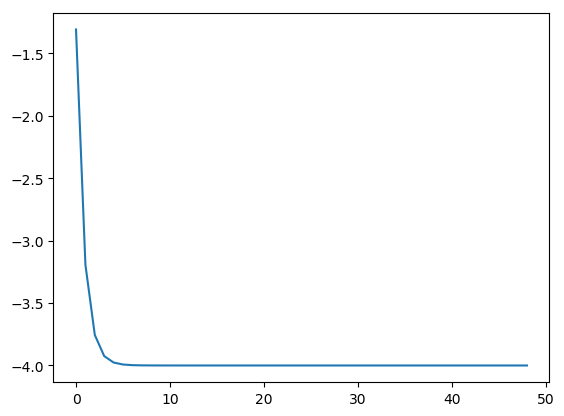

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x147628c50>

In [83]:
plot([x'*A*x for (x, gradx) in zip(iterates[2:50], grads[2:50])], label="grads")


In [86]:
[x'*A*x for (x, gradx) in zip(iterates[2:50], grads[2:50])]

49-element Array{Float64,1}:
 -1.30795
 -3.19258
 -3.75544
 -3.92473
 -3.97619
 -3.99225
 -3.99739
 -3.99907
 -3.99964
 -3.99984
 -3.99992
 -3.99995
 -3.99996
  ⋮      
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998
 -3.99998

1.6666666666666665